## Local Outlier Factor (LoF)
Local Outlier Factor can be used to detect anomalies within the training data, only. Therefore, _it cannot be deployed to predict unseen data_.

In [23]:
import os
import pandas as ps
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor as lof
from sklearn.neighbors import DistanceMetric as dm

You decide to create a list containing thirty examples with the value 1.0 and just one example with value 10.0, which you expect should be flagged as an outlier. To make sure you use the algorithm correctly, you convert the list to a pandas dataframe, and feed it into the local outlier factor algorithm.

In [17]:
# Create the list [1.0, 1.0, ..., 1.0, 10.0] as explained
x = [1.0]*30
x.append(10)

# Cast to a data frame
X = pd.DataFrame(x)

# Fit the local outlier factor and print the outlier scores
print(lof(contamination = 0.1).fit_predict(X))

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1]


The algorithm correctly identified the 10.0 as an outlier since it labeled it -1 which stands for anomalous. Let's move on.

In [18]:
np.random.seed(42)
# Generate train data
X = 0.3 * np.random.randn(100, 2)
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X + 2, X - 2, X_outliers]

In [19]:
# fit the model
clf = LocalOutlierFactor(n_neighbors=20, contamination = 0.05)
y_pred = clf.fit_predict(X)
y_pred_outliers = y_pred[200:]

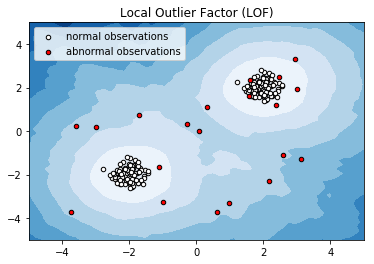

In [20]:
# plot the level sets of the decision function
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Local Outlier Factor (LOF)")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a = plt.scatter(X[:200, 0], X[:200, 1], c='white',
                edgecolor='k', s=20)
b = plt.scatter(X[200:, 0], X[200:, 1], c='red',
                edgecolor='k', s=20)
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a, b],
           ["normal observations",
            "abnormal observations"],
           loc="upper left")
plt.show()

### Distance-based-learning
- measure **similarity** or equilalenty **dissimilarity**

In [21]:
# set root directory
path_root = Path("C:/Users/giann/data-science-core")
os.chdir(path_root)
print(f'- Root directory = {os.getcwd()}')

- Root directory = C:\Users\giann\data-science-core


Measure distance between point in a **Euclidean** sense. Let's consider three point $x_{1} = [0 ,1]$, $x_{2} = [2 ,3]$ and $x_{3} = [0 , 6]$.

In [24]:
dist = dm.get_metric('euclidean')
X = [[0,1], [2,3], [0,6]]
print('Pair wise distance between point')
dist.pairwise(X)

Pair wise distance between point


array([[0.        , 2.82842712, 5.        ],
       [2.82842712, 0.        , 3.60555128],
       [5.        , 3.60555128, 0.        ]])

In [25]:
# double check: distance between [0, 1] and [2, 3]
X = np.matrix(X)
np.sqrt(np.sum(np.square(X[0,:] - X[1,:])))

2.8284271247461903

### Find the neighbor
Local outlier factor algorithm depends a lot on the idea of a nearest neighbor, which in turn depends on the choice of distance metric.

In [27]:
### Load hepatitis dataset
path_dataset = path_root / 'dataset/hep.csv'
data         = pd.read_csv(path_dataset) 
data.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2.0,34.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,95.0,28.0,4.0,75.0,1.0
1,2.0,39.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.3,78.0,30.0,4.4,85.0,1.0
2,2.0,32.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,59.0,249.0,3.7,54.0,1.0
3,2.0,41.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,81.0,60.0,3.9,52.0,1.0
4,2.0,30.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.2,57.0,144.0,4.9,78.0,1.0


In [28]:
features = data.drop('Class', axis =1)
labels   = data['Class']

In [29]:
# Compute outliers according to the Euclidean metric
out_eucl = lof(metric='euclidean', contamination = 0.1).fit_predict(features)

# Compute outliers according to the Hamming metric
out_hamm = lof(metric='hamming', contamination = 0.1).fit_predict(features)

# Compute outliers according to the Jaccard metric
out_jacc = lof(metric='jaccard', contamination = 0.1).fit_predict(features)

# Find if all three metrics agree on any one datapoint
print(any(out_jacc + out_hamm + out_eucl == -3))

False
